In [1]:
pip install ucimlrepo

In [2]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=09dfa0d95c454d2abf61f4eb7d9727b69705b58422739cc8f6b9256b0031ac31
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from ucimlrepo import fetch_ucirepo

census_income = fetch_ucirepo(id=20)

X = census_income.data.features
y = census_income.data.targets

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## **Columnas y tipos de datos**

In [5]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

## **Datos faltantes**

In [10]:
for column in X.columns:
    if (num_nulls := X[column].isna().sum()):
        print(f'Column "{column}" has {num_nulls} nulls')

Column "workclass" has 963 nulls
Column "occupation" has 966 nulls
Column "native-country" has 274 nulls


## **Análisis de variables numéricas**

In [6]:
X_num = X.select_dtypes(exclude=["object"])
X_num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

### **Análisis multivariable**

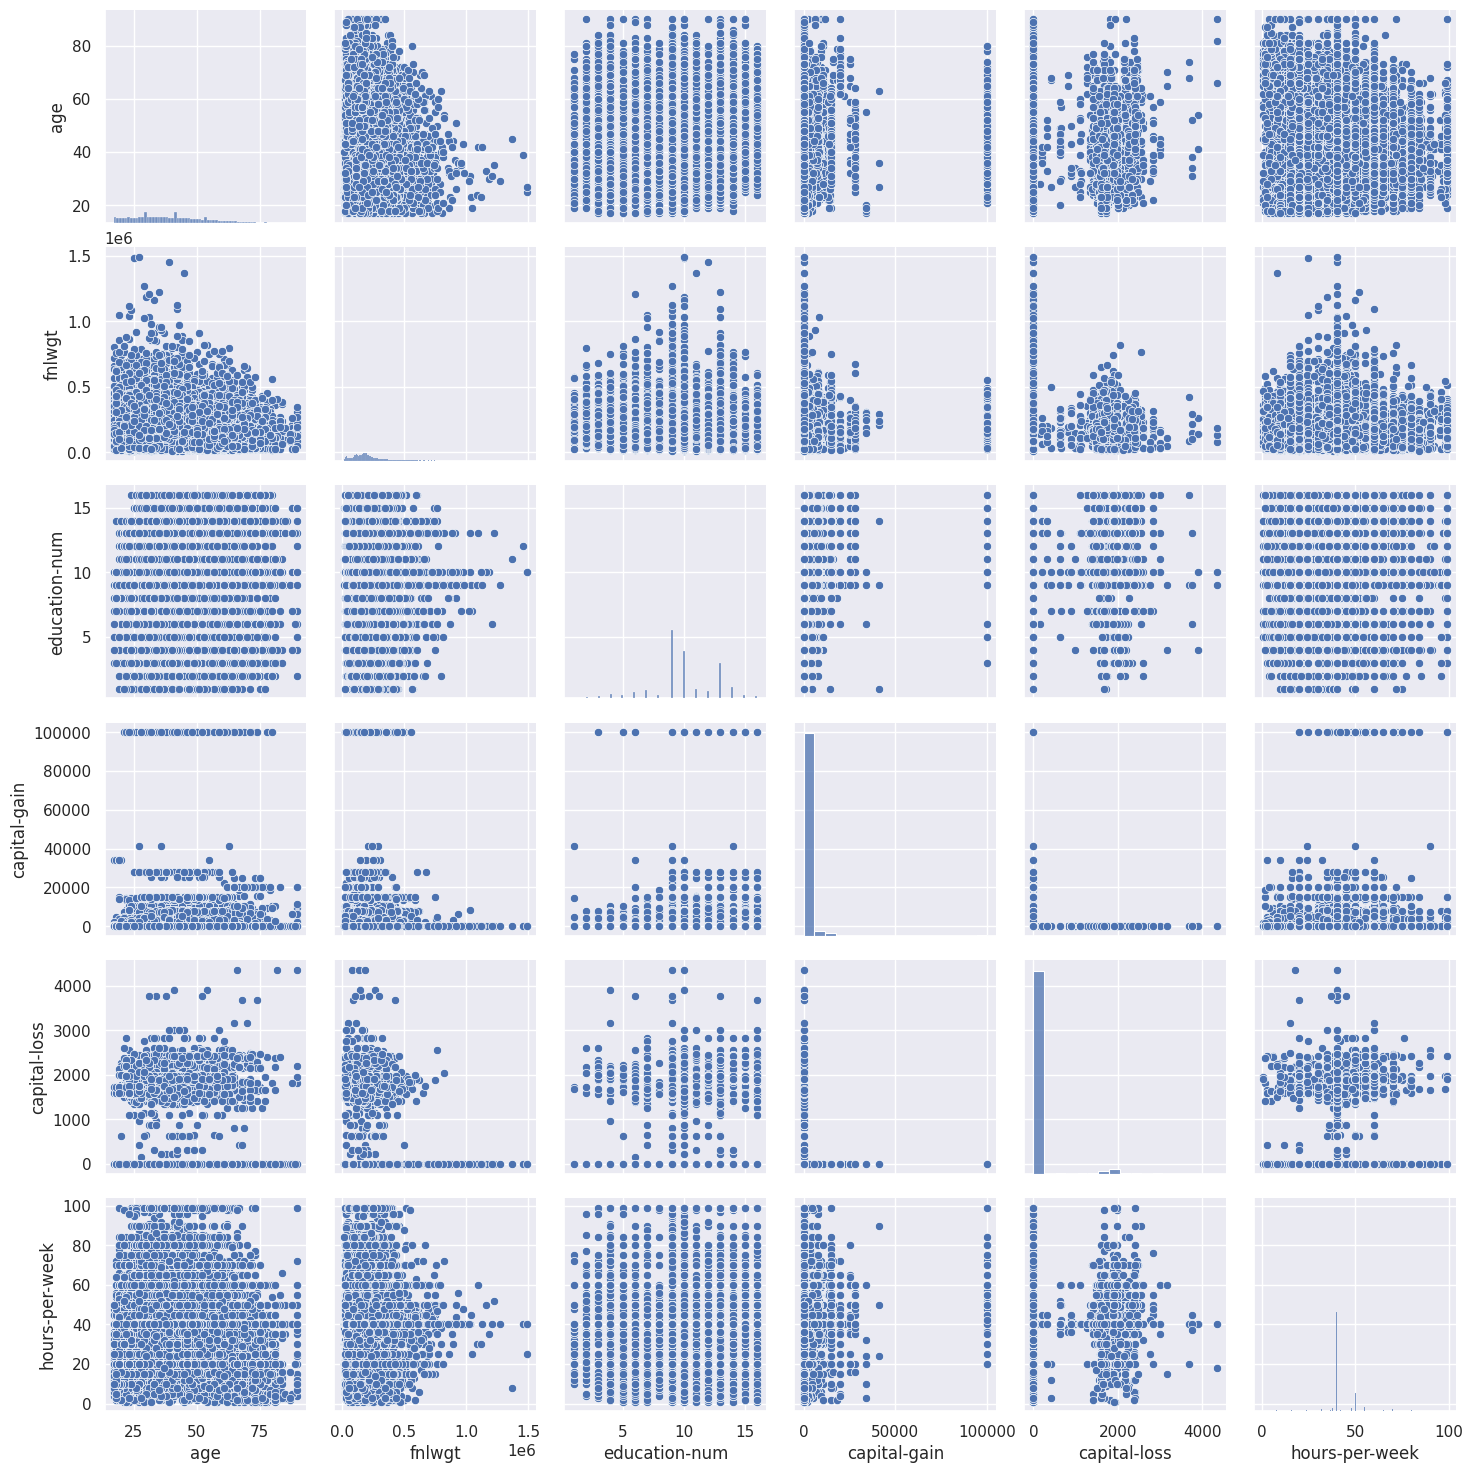

In [9]:
sns.pairplot(X_num)

### **Correlación de variables**

Es importante simplificar variables que estén altamente relacionadas. Para ello, calculamos la correlación entre las variables numéricas:

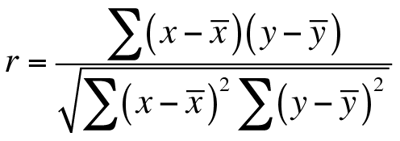

<Axes: >

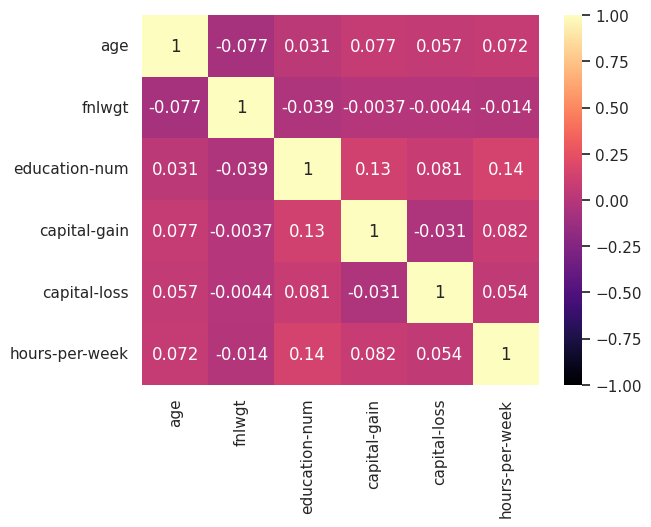

In [11]:
sns.heatmap(X_num.corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

En la matriz de correlación, no se observa ningún par de variables que estén altamente correlacionadas, por lo que todas son importantes y pueden aportar información útil al modelo, confirmando lo que se ve a simple vista en la matriz de dispersión.

## **Búsqueda de valores atípicos**

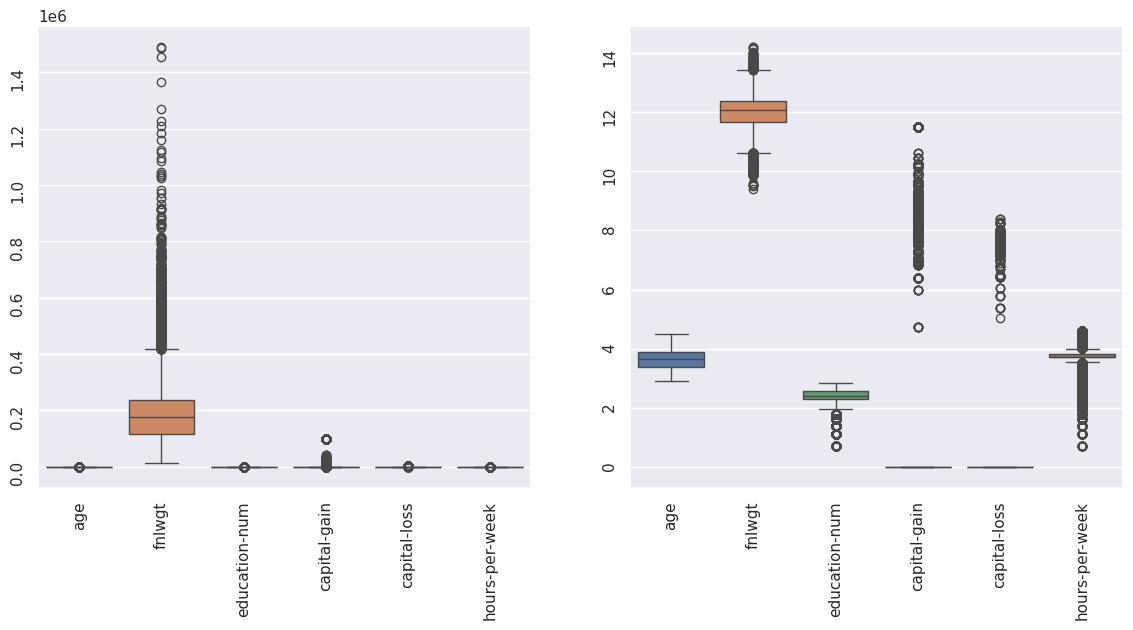

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot(data=X_num, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.boxplot(data=np.log1p(X_num), ax=ax2)
ax2.tick_params(labelrotation=90)
plt.show()

En los diagramas de caja, se puede observar una distribución extraña y un número considerable de datos atípicos, sobre todo para las variables `capital-gain` y `capital-loss`.

In [13]:
q1 = np.percentile(X_num["capital-gain"], 25)
q3 = np.percentile(X_num["capital-gain"], 75)

iqr = q3 - q1

lower_whisker = q1 - 1.5 * iqr

upper_whisker = q3 + 1.5 * iqr

print("Q1:", q1)
print("Q2:", q3)

Q1: 0.0
Q2: 0.0


In [14]:
print("Cantidad de atípicos: ", len(X_num[X_num["capital-gain"] > upper_whisker]) + len(X_num[X_num["capital-gain"] < lower_whisker]))

Cantidad de atípicos:  4035


Cálculando los cuantiles, se puede observar una peculiaridad, y es que es hay muchos datos en `0.0`. Exactamente 44807 (sólo 4035 son diferentes de `0.0`), lo que hace inviable eliminarlos porque reduciría el tamaño del dataset a menos de su 10%.

Además, se descartó temporalmente eliminar la columna de los datos, ya que, incluso con esta distribución, puede aportar información al modelo.

La misma situación ocurre con la variable `capital-loss` (46560 datos en `0.0`).